# Loading data

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import * # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Use this website to generate the direct link efficiently: https://sites.google.com/site/gdocs2direct/

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ" -O "diabetes.csv"


--2023-10-04 13:17:04--  https://drive.google.com/uc?export=download&id=1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ
Resolving drive.google.com (drive.google.com)... 173.194.215.113, 173.194.215.138, 173.194.215.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pa6ivui1fvhid5goegrgrf1h8lrlocbo/1696425375000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=754dec71-e6cb-4926-bc83-c55df2d0ba4f [following]
--2023-10-04 13:17:05--  https://doc-0o-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pa6ivui1fvhid5goegrgrf1h8lrlocbo/1696425375000/14399582566128250596/*/1NobyxtdDL9CsWeM9yUPtYyjLnUJb6VBJ?e=download&uuid=754dec71-e6cb-4926-bc83-c55df2d0ba4f
Resolving doc-0o-c4-docs.googleusercontent.com (doc-0o-c4-docs.googleusercontent.com)... 142.251.107.132, 

In [ ]:
# ! cat ./diabetes.csv


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
X = pima[feature_cols] # Features
y = pima.label # Target variable
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Training decision tree using scikit-learn

In [ ]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


# Visualizing decision tree

## Using scikit-learn

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_4 <= 129.50
|   |--- feature_2 <= 26.30
|   |   |--- feature_2 <= 9.10
|   |   |   |--- feature_3 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  26.30
|   |   |--- feature_3 <= 27.50
|   |   |   |--- feature_2 <= 45.40
|   |   |   |   |--- feature_5 <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  12.00
|   |   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |   |--- feature_6 <= 1.27
|   |   |   |   |   |   |   |--- feature_2 <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  30.95
|   |   |   |   |   |   |   |   |--- feature_5 <= 53.00
|

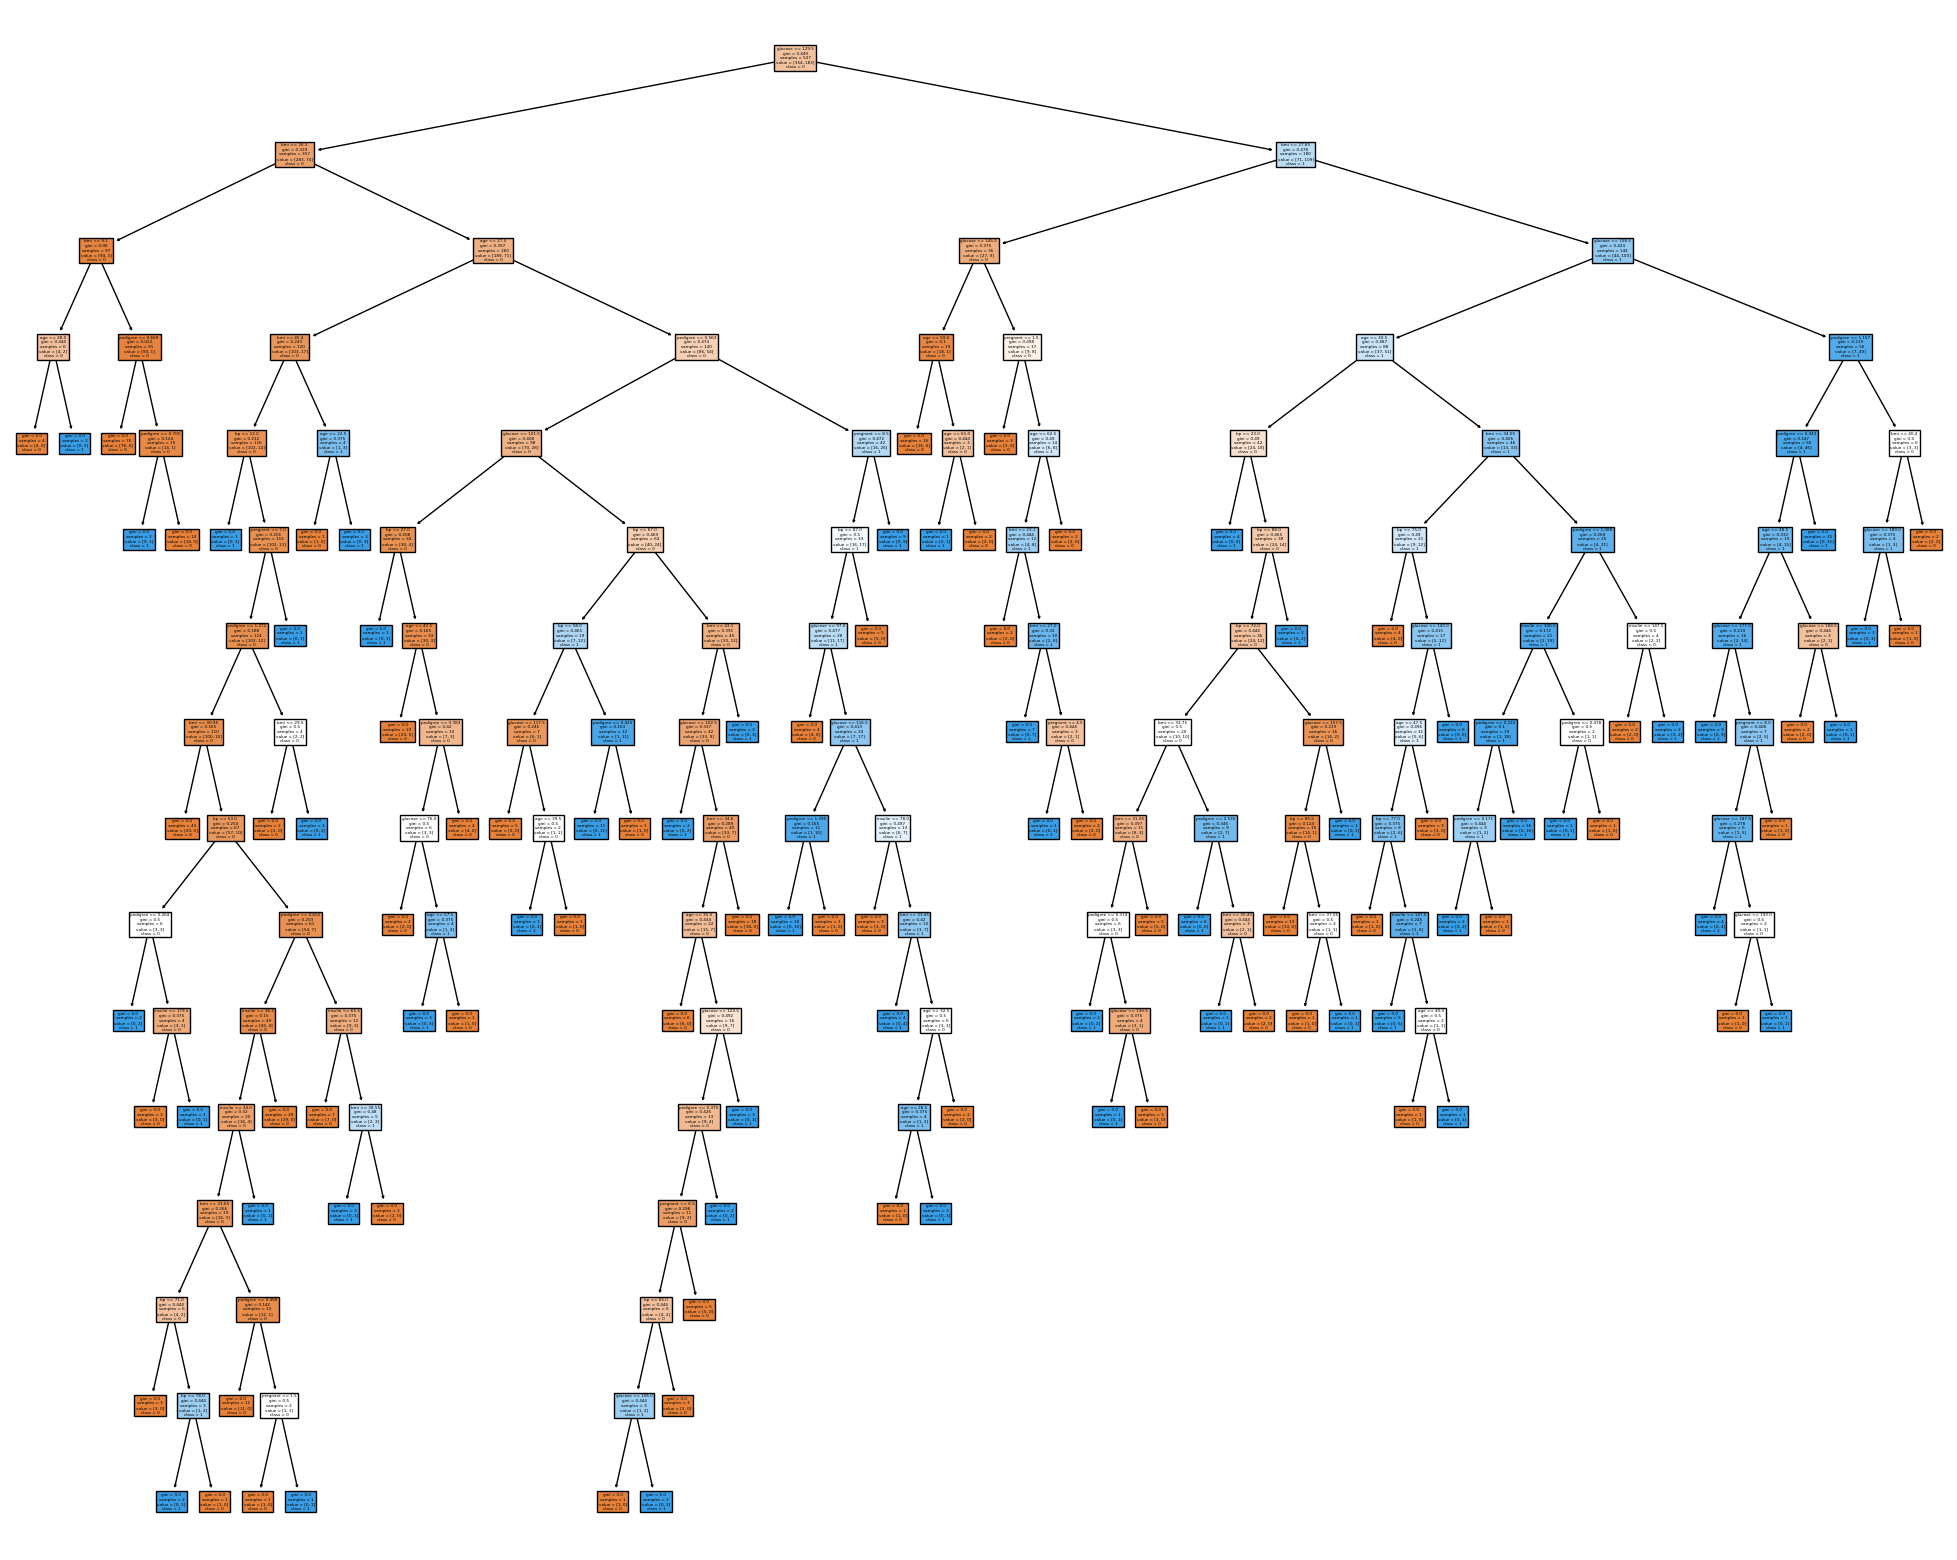

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled=True)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7705627705627706


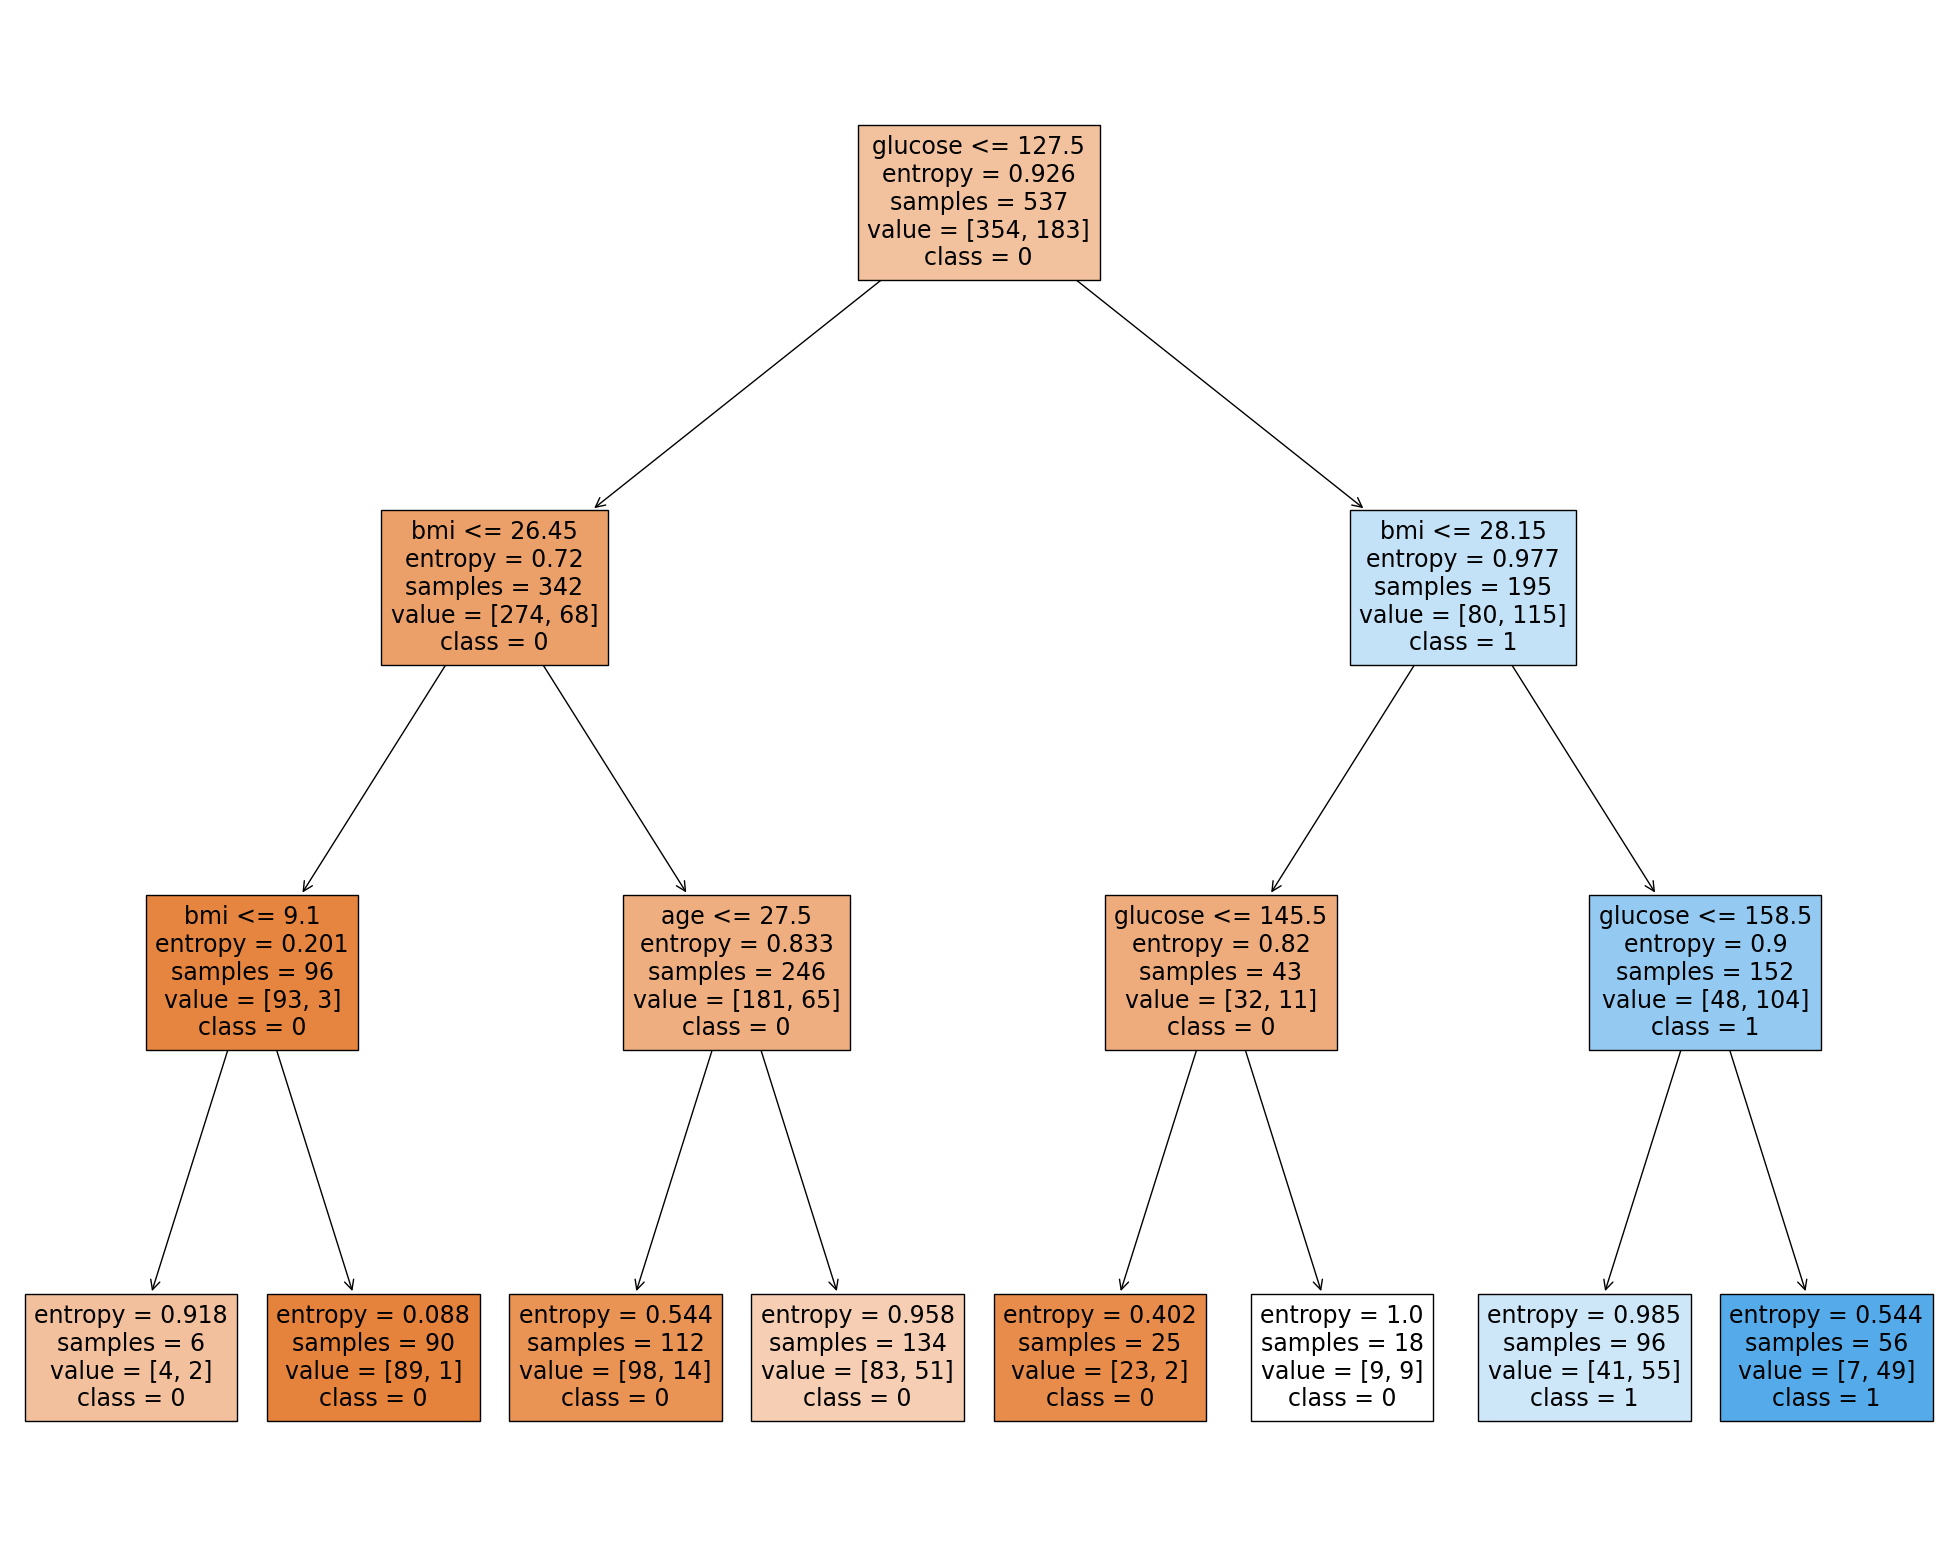

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_cols,
                   class_names=['0','1'],
                   filled=True)
